## IMPORT

In [344]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

### 1. Baca dataset customers_dirty.csv ke dalam Python menggunakan Pandas. Tampilkan 5 baris
pertama.

In [345]:
df = pd.read_csv('customers_dirty.csv')
df_copy = df.copy()
df_copy.head(5)

,CustomerID,Age,Annual_Income,Spending_Score,Gender,City
0,1,56.0,62.0,65.0,F,Surabaya
1,2,46.0,145.0,86.0,M,Bandung
2,3,32.0,68.0,17.0,F,Jakarta
3,4,25.0,134.0,71.0,Male,BDG
4,5,38.0,130.0,89.0,M,BDG


### 2. Tampilkan informasi umum dataset (jumlah baris, kolom, dan tipe data).


In [346]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      255 non-null    int64  
 1   Age             245 non-null    float64
 2   Annual_Income   245 non-null    float64
 3   Spending_Score  246 non-null    float64
 4   Gender          255 non-null    object 
 5   City            255 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 12.1+ KB


### 3. Hitung jumlah nilai yang hilang (missing values) di setiap kolom.


In [347]:
df_copy.isnull().sum()

CustomerID         0
Age               10
Annual_Income     10
Spending_Score     9
Gender             0
City               0
dtype: int64

### 4. Hapus semua baris yang duplikat dari dataset. 

In [348]:
print(f"Jumlah baris duplikat: {df_copy.duplicated().sum()}")

Jumlah baris duplikat: 5


In [349]:
df_copy = df_copy.drop_duplicates()
print(f"Jumlah baris duplikat: {df_copy.duplicated().sum()}")

Jumlah baris duplikat: 0


### 5. Isikan missing values pada kolom numerik (Age, Annual_Income, Spending_Score) dengan
median masing-masing kolom.

In [350]:
for col in ["Age", "Annual_Income", "Spending_Score"]:
    df_copy[col] = df_copy[col].fillna(df_copy[col].median())
df_copy.isnull().sum()

CustomerID        0
Age               0
Annual_Income     0
Spending_Score    0
Gender            0
City              0
dtype: int64

### 6. Ubah data Gender menjadi hanya "Male" dan "Female" (hindari M/F, male/female).

In [351]:
# 6. Ubah data Gender menjadi hanya "Male" dan "Female" (hindari M/F, male/female).
df_copy['Gender'] = df_copy['Gender'].replace({
    'M': 'Male', 
    'F': 'Female', 
    'male': 'Male', 
    'female': 'Female'})
df_copy['Gender'].unique()

array(['Female', 'Male'], dtype=object)

### 7. Standarisasi nama kota, misalnya ubah "JKT" → "Jakarta" dan "BDG" → "Bandung"

In [352]:
df_copy['City'] = df_copy['City'].replace({
    'JKT': 'Jakarta', 
    'BDG': 'Bandung'
    })
df_copy['City'].unique()

array(['Surabaya', 'Bandung', 'Jakarta', 'Medan'], dtype=object)

### 8. Deteksi dan tangani outlier pada kolom Annual_Income dengan metode IQR

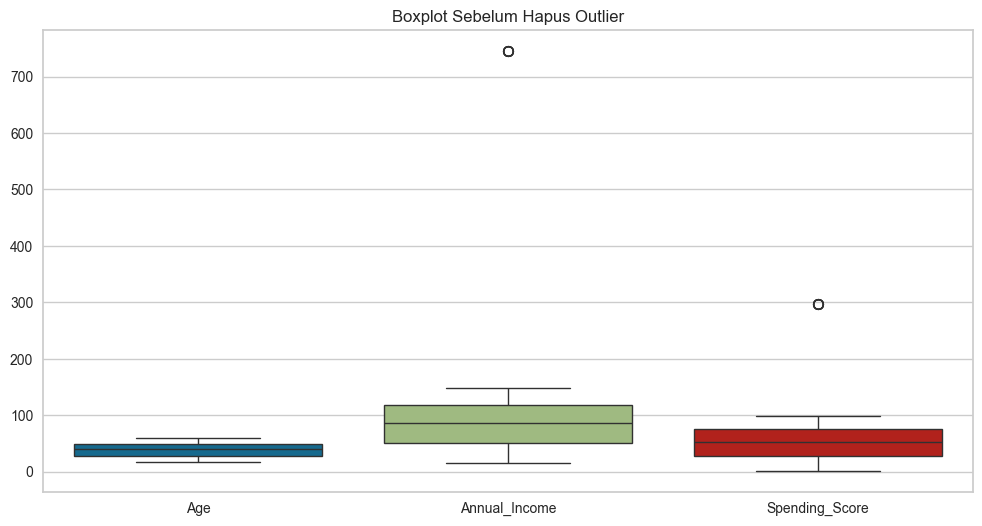

In [353]:
# Visualisasi fitur numerik boxplot sebelum scaling 
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_copy[['Age', 'Annual_Income', 'Spending_Score']])
plt.title('Boxplot Sebelum Hapus Outlier')
plt.show()

In [354]:
print("Jumlah data sebelum hapus outlier:", len(df_copy)) 
Q1 = df_copy['Annual_Income'].quantile(0.25) 
Q3 = df_copy['Annual_Income'].quantile(0.75)
IQR = Q3 - Q1                          
batas_bawah = Q1 - 1.5 * IQR
batas_atas  = Q3 + 1.5 * IQR
print('Batas bawah:', batas_bawah)
print('Batas atas:', batas_atas)

# Menampilkan data outlier
outliers = df_copy[(df_copy['Annual_Income'] < batas_bawah) | (df_copy['Annual_Income'] > batas_atas)]
print(f'Jumlah data outlier pada kolom Annual_Income: {len(outliers)}\n{outliers}') 

# Menghapus outlier
df_copy = df_copy[(df_copy['Annual_Income'] >= batas_bawah) & (df_copy['Annual_Income'] <= batas_atas)] 
print("Jumlah data setelah hapus data outlier:", len(df_copy)) 


Jumlah data sebelum hapus outlier: 250
Batas bawah: -51.375
Batas atas: 219.625
Jumlah data outlier pada kolom Annual_Income: 5
     CustomerID   Age  Annual_Income  Spending_Score  Gender     City
37           38  35.0          745.0           297.0    Male  Bandung
39           40  42.0          745.0           297.0  Female  Jakarta
57           58  21.0          745.0           297.0    Male  Bandung
188         189  49.0          745.0           297.0    Male  Bandung
214         215  37.0          745.0           297.0    Male  Jakarta
Jumlah data setelah hapus data outlier: 245


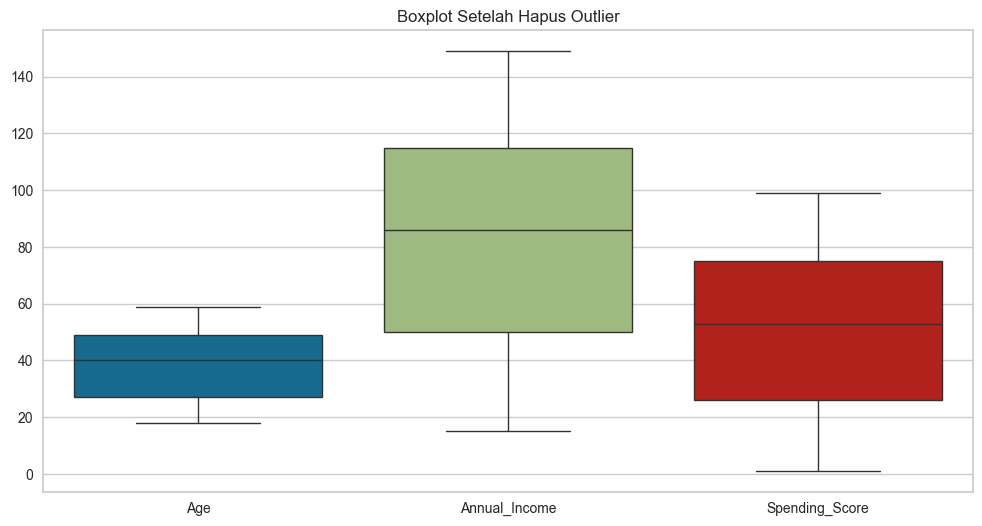

In [355]:
#boxplot setelah hapus outlier
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_copy[['Age', 'Annual_Income', 'Spending_Score']])
plt.title('Boxplot Setelah Hapus Outlier')
plt.show()

### 9. Buat kolom baru bernama Income_per_Age = Annual_Income / Age.


In [356]:
df_copy['Income_per_Age'] = df_copy['Annual_Income'] / df_copy['Age']
df_copy.head()

,CustomerID,Age,Annual_Income,Spending_Score,Gender,City,Income_per_Age
0,1,56.0,62.0,65.0,Female,Surabaya,1.107143
1,2,46.0,145.0,86.0,Male,Bandung,3.152174
2,3,32.0,68.0,17.0,Female,Jakarta,2.125000
3,4,25.0,134.0,71.0,Male,Bandung,5.360000
4,5,38.0,130.0,89.0,Male,Bandung,3.421053


### 10. Visualisasikan distribusi usia pelanggan dalam bentuk histogram

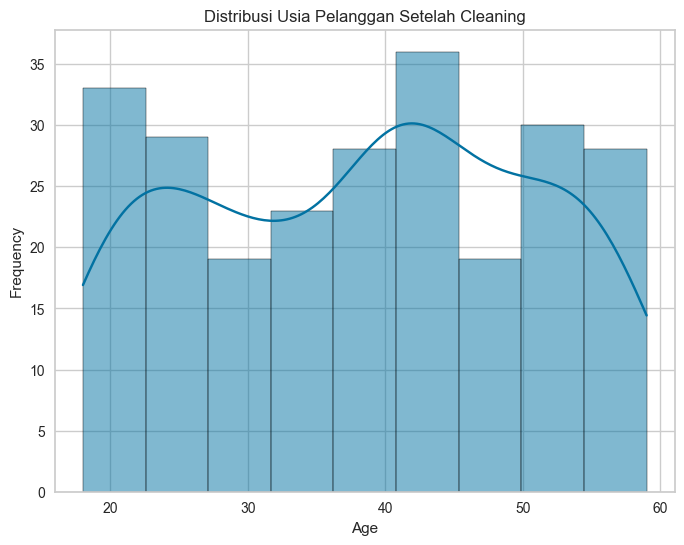

In [357]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_copy, x='Age', kde=True)
plt.title('Distribusi Usia Pelanggan Setelah Cleaning')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### 11. Buat scatter plot Annual_Income vs Spending_Score dengan warna berdasarkan Gender.

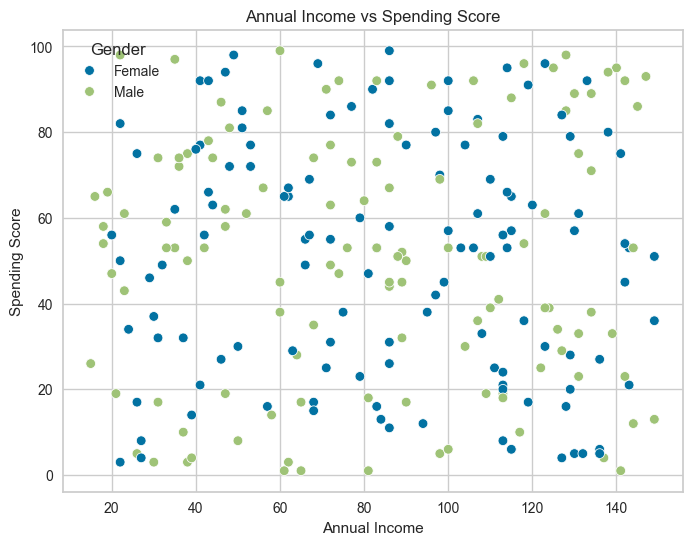

In [358]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_copy, x='Annual_Income', y='Spending_Score', hue='Gender')
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

### 12. Hitung rata-rata Spending_Score untuk setiap kota dan tampilkan dalam bentuk tabel

In [359]:
city_spending_score = df_copy.groupby('City')['Spending_Score'].mean()
print(city_spending_score)

City
Bandung     54.320988
Jakarta     48.641975
Medan       48.102564
Surabaya    50.000000
Name: Spending_Score, dtype: float64


### 13. Pilih fitur numerik (Age, Annual_Income, Spending_Score) sebagai variabel untuk clustering

In [360]:
features = df_copy[['Age', 'Annual_Income', 'Spending_Score']]
features.head()

,Age,Annual_Income,Spending_Score
0,56.0,62.0,65.0
1,46.0,145.0,86.0
2,32.0,68.0,17.0
3,25.0,134.0,71.0
4,38.0,130.0,89.0


### 14. Terapkan KMeans dengan 3 cluster pada data tersebut.

In [361]:
model_kmeans = KMeans(n_clusters=3, random_state=42, n_init=3)
df_copy['Cluster'] = model_kmeans.fit_predict(features)
print("Cluster centers:\n", model_kmeans.cluster_centers_)

Cluster centers:
 [[ 40.10526316  60.13157895  73.84210526]
 [ 38.27678571 119.39285714  47.83928571]
 [ 36.28070175  47.03508772  25.36842105]]


### 15. Tambahkan label cluster ke dataset asli.

In [362]:
df_copy['KMeans_Cluster'] = model_kmeans.predict(features)
df_copy.head()

,CustomerID,Age,Annual_Income,Spending_Score,Gender,City,Income_per_Age,Cluster,KMeans_Cluster
0,1,56.0,62.0,65.0,Female,Surabaya,1.107143,0,0
1,2,46.0,145.0,86.0,Male,Bandung,3.152174,1,1
2,3,32.0,68.0,17.0,Female,Jakarta,2.125000,2,2
3,4,25.0,134.0,71.0,Male,Bandung,5.360000,1,1
4,5,38.0,130.0,89.0,Male,Bandung,3.421053,1,1


### 16. Visualisasikan hasil cluster pada scatter plot Annual_Income vs Spending_Score dengan warna berdasarkan cluster

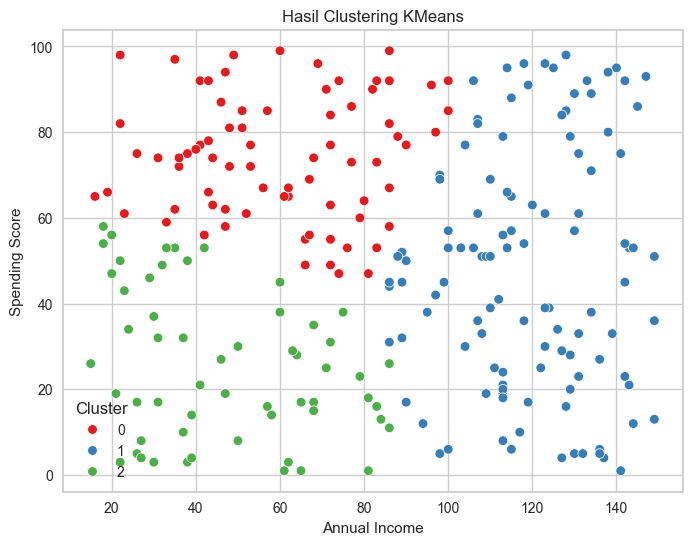

In [363]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_copy, 
    x='Annual_Income', 
    y='Spending_Score', 
    hue='KMeans_Cluster', 
    palette='Set1')
plt.title('Hasil Clustering KMeans')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster', loc='lower left')
plt.show()

### 17. Terapkan metode Hierarchical Clustering menggunakan linkage ward.

In [364]:
Z = linkage(features, method='ward')
display(Z[:5])


array([[140.        , 161.        ,   1.        ,   2.        ],
       [114.        , 209.        ,   1.41421356,   2.        ],
       [ 12.        , 167.        ,   2.        ,   2.        ],
       [  0.        ,  19.        ,   2.23606798,   2.        ],
       [ 52.        , 110.        ,   2.23606798,   2.        ]])

### 18. Buat dendrogram untuk melihat hubungan antar data

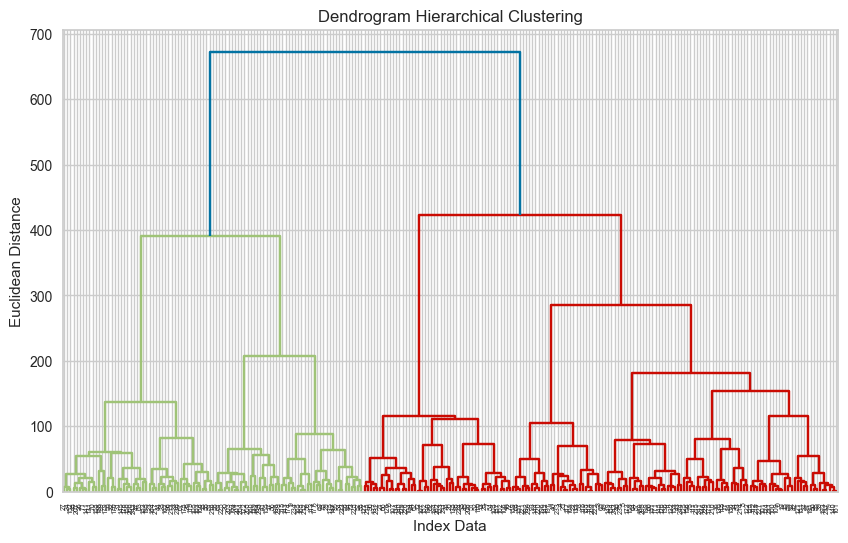

In [365]:
plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode=None, p=30)
plt.title('Dendrogram Hierarchical Clustering')
plt.xlabel('Index Data')
plt.ylabel('Euclidean Distance')
plt.show()

### 19. Tentukan jumlah cluster yang optimal berdasarkan dendrogram. (analisis visual lakukan secara manual). Jelaskan tentang diagram itu.


Untuk menentukan jumlah cluster optimal, kita mencari "elbow point" atau titik dimana terjadi lompatan jarak vertikal terbesar sebelum semua data bergabung menjadi satu cluster besar.

Berdasarkan dendrogram yang ditampilkan:

1. Pengamatan Visual:
- Terdapat dua lompatan vertikal yang sangat signifikan pada jarak sekitar 400-650
- Bagian bawah dendrogram (jarak 0-200) menunjukkan penggabungan yang relatif bertahap
- Bagian tengah (jarak 200-400) masih menunjukkan jarak yang wajar
- Lompatan drastis terjadi saat mencapai jarak ~400 ke atas

2. Metode Pemotongan:
- Jika kita tarik garis horizontal pada jarak ~400, dendrogram akan terpotong menjadi 3 cabang utama
- Ini menunjukkan bahwa data secara alami terbagi menjadi 3 kelompok besar

Kesimpulan:
Jumlah cluster optimal berdasarkan analisis dendrogram adalah 3 cluster.

### 20. Bandingkan hasil clustering KMeans dan Hierarchical. Apakah ada perbedaan signifikan? (Lakukan analisis deskriptif mu.)


Berdasarkan visualisasi dendrogram dan scatter plot hasil clustering KMeans yang telah ditampilkan:

1. Konsistensi Jumlah Cluster

Kesamaan:

- Baik dendrogram maupun KMeans menunjukkan bahwa 3 cluster adalah jumlah optimal untuk dataset ini
- Hal ini menunjukkan adanya konsistensi struktur data yang terdeteksi oleh kedua metode
2. Pola Pembagian Cluster

Dari scatter plot KMeans terlihat:

- Cluster 0 (Merah): Spending Score tinggi (60-100)
- Cluster 1 (Biru): Spending Score bervariasi (0-100)
- Cluster 2 (Hijau): Spending Score rendah (0-40)

3. Kualitas Pemisahan Cluster

Kelebihan KMeans:

- Menghasilkan cluster yang lebih kompak dan bulat
- Cluster boundaries yang lebih tegas

Kelebihan Hierarchical:

- Menunjukkan hubungan hierarkis antar data point
- Memberikan fleksibilitas untuk memilih jumlah cluster di berbagai level
- Lebih baik menangani cluster dengan bentuk tidak beraturan
4. Perbedaan Signifikan

Tidak Ada Perbedaan Signifikan karena:

- Struktur Data Konsisten: Kedua metode mengidentifikasi 3 kelompok utama yang sama
- Pola Clustering Serupa: Pembagian berdasarkan kombinasi Annual Income dan Spending Score menghasilkan pola yang konsisten

Kesimpulan

Tidak terdapat perbedaan signifikan antara hasil clustering KMeans dan Hierarchical untuk dataset ini. Kedua metode berhasil mengidentifikasi 3 cluster pelanggan yang sama

### 21. Buat heatmap untuk melihat korelasi antar fitur numerik dalam dataset. Apa informasi yang bisa diperoleh dari korelasi ini?


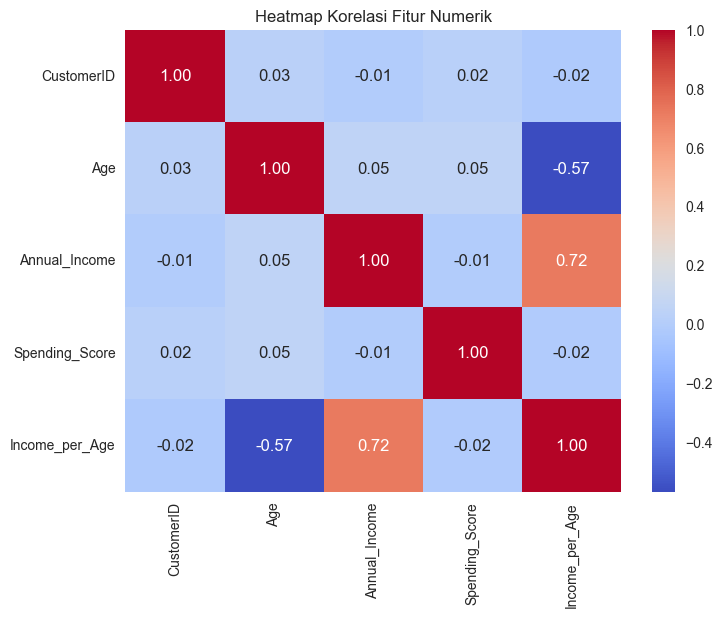

In [ ]:
plt.figure(figsize=(8, 6))
numeric_cols = ['CustomerID', 'Age', 'Annual_Income', 'Spending_Score','Income_per_Age']
correlation = df_copy[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

Informasi yang Bisa Diperoleh dari Heatmap Korelasi
Berdasarkan heatmap korelasi fitur numerik yang ditampilkan, berikut adalah informasi penting yang dapat diperoleh:

1. Korelasi Kuat Positif

Income_per_Age vs Annual_Income (0.72):

- Terdapat korelasi positif yang cukup kuat
- Semakin tinggi pendapatan tahunan, semakin tinggi rasio pendapatan per usia
- Hal ini masuk akal karena Income_per_Age dihitung dari Annual_Income
2. Korelasi Kuat Negatif

Income_per_Age vs Age (-0.57):

- Terdapat korelasi negatif yang sedang-kuat
- Semakin tua usia, semakin rendah rasio pendapatan per usia
- Menunjukkan bahwa pelanggan yang lebih muda cenderung memiliki rasio pendapatan per usia yang lebih tinggi
3. Korelasi Lemah/Tidak Signifikan

Fitur-fitur berikut menunjukkan korelasi yang sangat lemah (mendekati 0):

- Age vs Annual_Income (0.05)
- Spending_Score vs Age (0.05)
- Annual_Income vs Spending_Score (-0.01)
- CustomerID dengan semua fitur (mendekati 0)




Berdasarkan analisis clustering dan korelasi pada dataset tersebut dapat disimpulkan bahwa terdapat 3 segmentasi utama yaitu: 
- Cluster 0 (High Spenders): Pelanggan dengan spending score tinggi (60-100) namun income rendah-sedang
- Cluster 1 (High Income Earners): Pelanggan dengan pendapatan tinggi (80-140) dan spending bervariasi
- Cluster 2 (Conservative Spenders): Pelanggan dengan spending score rendah (0-40) dan income rendah-sedang

Dengan memanfaatkan segementasi tersebut kita dapat mengimplementasikan strategi marketing yang tepat sasaran seperti: 
- Cluster 0: Target promosi produk premium dengan cicilan atau diskon besar
- Cluster 1: Fokus pada produk eksklusif dan layanan VIP
- Cluster 2: Tawarkan produk value for money dan program loyalitas

In [367]:
df_copy.to_csv('customers_new.csv', index=False)
print("Data telah disimpan ke 'customers_new.csv'")

Data telah disimpan ke 'customers_new.csv'
